<a href="https://colab.research.google.com/github/gyeongdong13/Competition/blob/main/%ED%86%B5%ED%95%A9%EB%B3%B8%EC%84%A0(%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85%2C_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%2C_%EC%95%99%EC%83%81%EB%B8%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skippin

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/시니어/통합본선 최종 - 이상치 변환.csv', encoding='utf-8')

df.head()

,행정동,계총인구수,요보호 노인인구 비율,평균소득,총가구수,영역둘레(평균상권),영역면적(평균상권),의료기관수,1의료기관 당 요보호 노인인구 (종속변수),행정동 면적,...,보건소,보건지소,보건진료소,상급종합,의원,종합병원,치과병원,치과의원,한방병원,한의원
0,가음정동,38875.0,2.22,4727.67,7924,657.13,35157.54,37.0,0.06,2.89,...,0,0,0,0,15.0,0,0,12.0,0,9.0
1,가포동,2279.0,3.95,3001.30,15529,10229.23,2705034.00,1.0,3.95,4.47,...,0,0,0,0,0.0,0,0,0.0,0,0.0
2,경화동,10824.0,6.23,2241.70,3198,1313.01,153242.20,16.0,0.39,2.12,...,0,0,0,0,6.0,0,0,3.0,0,7.0
3,교방동,15947.0,7.73,2323.80,19918,1008.87,108515.20,10.0,0.77,2.73,...,0,0,0,0,3.0,0,0,4.0,0,3.0
4,구산면,4072.0,16.90,2139.00,14839,12028.37,4010639.00,3.0,5.63,43.64,...,0,1,1,0,1.0,0,0,0.0,0,0.0


In [ ]:
df = df.iloc[:,1:]
df.head()

,계총인구수,요보호 노인인구 비율,평균소득,총가구수,영역둘레(평균상권),영역면적(평균상권),의료기관수,1의료기관 당 요보호 노인인구 (종속변수),행정동 면적,상권 개수,...,보건소,보건지소,보건진료소,상급종합,의원,종합병원,치과병원,치과의원,한방병원,한의원
0,38875.0,2.22,4727.67,7924,657.13,35157.54,37.0,0.06,2.89,83,...,0,0,0,0,15.0,0,0,12.0,0,9.0
1,2279.0,3.95,3001.30,15529,10229.23,2705034.00,1.0,3.95,4.47,2,...,0,0,0,0,0.0,0,0,0.0,0,0.0
2,10824.0,6.23,2241.70,3198,1313.01,153242.20,16.0,0.39,2.12,20,...,0,0,0,0,6.0,0,0,3.0,0,7.0
3,15947.0,7.73,2323.80,19918,1008.87,108515.20,10.0,0.77,2.73,21,...,0,0,0,0,3.0,0,0,4.0,0,3.0
4,4072.0,16.90,2139.00,14839,12028.37,4010639.00,3.0,5.63,43.64,11,...,0,1,1,0,1.0,0,0,0.0,0,0.0


# 엘라스틱넷 -> 앙상블

In [ ]:
x = df.iloc[:, [1,5,13,14]]
y = df.iloc[:, 7]
x.head(5), y.head(5)

(   요보호 노인인구 비율  영역면적(평균상권)  행정동별 병원간의 평균거리  병원에서 가장 가까운 버스정류장 평균 거리
 0         2.22    35157.54            0.56                     0.20
 1         3.95  2705034.00            0.00                     0.09
 2         6.23   153242.20            0.35                     0.09
 3         7.73   108515.20            0.56                     0.11
 4        16.90  4010639.00            2.47                     0.10,
 0    0.06
 1    3.95
 2    0.39
 3    0.77
 4    5.63
 Name: 1의료기관 당 요보호 노인인구 (종속변수), dtype: float64)

In [ ]:
from sklearn.preprocessing  import StandardScaler # 표준화

scaler = StandardScaler()
xs = scaler.fit_transform(x) # 각 독립변수의 평균과 표준편차 이용하여 단위 축소
x = pd.DataFrame(xs, columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 랜덤포레스트 모델 생성
random_forest_model = RandomForestRegressor(random_state=42)

# 그레디언트 부스팅 모델 생성
gradient_boosting_model = GradientBoostingRegressor(random_state=42)


# 랜덤 포레스트 모델에 대한 하이퍼파라미터 그리드 설정
rf_param_grid = {
    'n_estimators': [50, 100, 150],        # 결정 트리의 개수
    'max_depth': [None, 10, 20, 30],       # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],       # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],         # 리프 노드가 되기 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt']       # 최대 선택할 특성의 수
}

# 그레디언트 부스팅 모델에 대한 하이퍼파라미터 그리드 설정
gb_param_grid = {
    'n_estimators': [50, 100, 150],        # 결정 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],     # 학습률
    'max_depth': [3, 5, 7],                # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],       # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],         # 리프 노드가 되기 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 랜덤 포레스트 모델의 최적 하이퍼파라미터 찾기
rf_grid_search = GridSearchCV(random_forest_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# GridSearchCV를 사용하여 그레디언트 부스팅 모델의 최적 하이퍼파라미터 찾기
gb_grid_search = GridSearchCV(gradient_boosting_model, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값 출력
print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Gradient Boosting Best Params:", gb_grid_search.best_params_)

Random Forest Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델을 생성
random_forest_model = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)

# 그레디언트 부스팅 모델을 생성
gradient_boosting_model = GradientBoostingRegressor(**gb_grid_search.best_params_, random_state=42)

# 랜덤 포레스트 모델 학습
random_forest_model.fit(X_train, y_train)

# 그레디언트 부스팅 모델 학습
gradient_boosting_model.fit(X_train, y_train)

# 테스트 데이터셋을 이용하여 모델을 평가
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# 성능평가
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))


RMSE_rf = mean_squared_error(y_test, y_pred_rf)**(1/2)
RMSE_gb = mean_squared_error(y_test, y_pred_gb)**(1/2)
print("rf RMSE : ", RMSE_rf, "gb RMSE : ", RMSE_gb)

Random Forest R2 Score: 0.606158095513337
Gradient Boosting R2 Score: 0.938878718379941
rf RMSE :  1.0816410737608089 gb RMSE :  0.42610677090074417


In [ ]:
from sklearn.ensemble import VotingRegressor

# VotingRegressor를 사용하여 두 모델을 결합
ensemble_model = VotingRegressor([('rf', random_forest_model), ('gb', gradient_boosting_model)])

# 앙상블 모델을 학습
ensemble_model.fit(X_train, y_train)

# 테스트 데이터셋을 이용하여 앙상블 모델을 평가
y_pred_ensemble = ensemble_model.predict(X_test)

# 성능지표
print("Ensemble R2 Score:", r2_score(y_test, y_pred_ensemble))
print("Ensemble RMSE:", mean_squared_error(y_test, y_pred_ensemble)**(1/2))

Ensemble R2 Score: 0.8462534534469089
Ensemble RMSE: 0.675810435933876


# 그레디언트 부스팅이 R2 score : 93.8% RMSE : 0.42으로 다른 모델들에 비해 가장 우수

In [ ]:
from sklearn.inspection import permutation_importance

importance = gradient_boosting_model.feature_importances_

result = permutation_importance(gradient_boosting_model, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean
importance

array([0.24708953, 0.61891968, 0.24032179, 0.15896744])

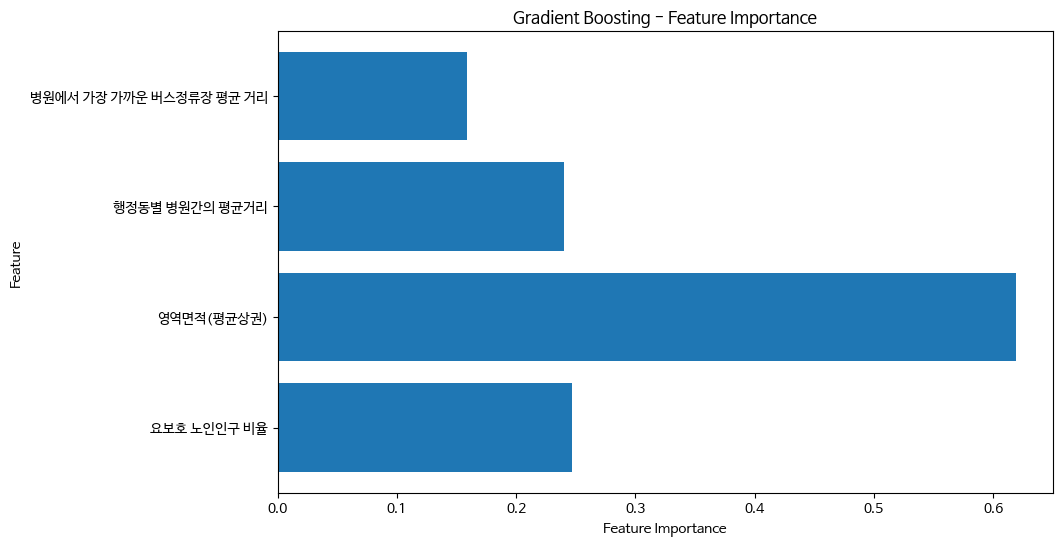

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
plt.rc('font', family='NanumBarunGothic') # 나눔고딕 폰트 사용

feature_names = list(X_train.columns)

# 변수 중요도를 막대 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting - Feature Importance')
plt.show()